In [38]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as ex
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
py.init_notebook_mode(connected=True)

In [39]:
df=pd.read_csv('covid_19_data.csv')  # covid-19 data set

In [40]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              18327 non-null  int64  
 1   ObservationDate  18327 non-null  object 
 2   Province/State   9050 non-null   object 
 3   Country/Region   18327 non-null  object 
 4   Last Update      18327 non-null  object 
 5   Confirmed        18327 non-null  float64
 6   Deaths           18327 non-null  float64
 7   Recovered        18327 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [42]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,18327.000000,18327.000000,18327.000000,18327.000000
mean,9164.000000,3030.015551,180.680417,764.542424
std,5290.693527,15129.079515,1362.099905,5618.658958
min,1.000000,0.000000,0.000000,0.000000
25%,4582.500000,9.000000,0.000000,0.000000
50%,9164.000000,101.000000,1.000000,2.000000
75%,13745.500000,674.500000,8.000000,71.000000
max,18327.000000,271590.000000,25969.000000,109800.000000


# Data Cleaning 

In [43]:
symptoms={'symptom':['Fever',  #Adding Symptoms 
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}
symptoms=pd.DataFrame(data=symptoms,index=range(14))

In [44]:
symptoms['symptom']

0                       Fever
1                   Dry cough
2                     Fatigue
3           Sputum production
4         Shortness of breath
5                 Muscle pain
6                 Sore throat
7                    Headache
8                      Chills
9          Nausea or vomiting
10           Nasal congestion
11                  Diarrhoea
12                Haemoptysis
13    Conjunctival congestion
Name: symptom, dtype: object

In [45]:
symptoms['percentage']

0     87.9
1     67.7
2     38.1
3     33.4
4     18.6
5     14.8
6     13.9
7     13.6
8     11.4
9      5.0
10     4.8
11     3.7
12     0.9
13     0.8
Name: percentage, dtype: float64

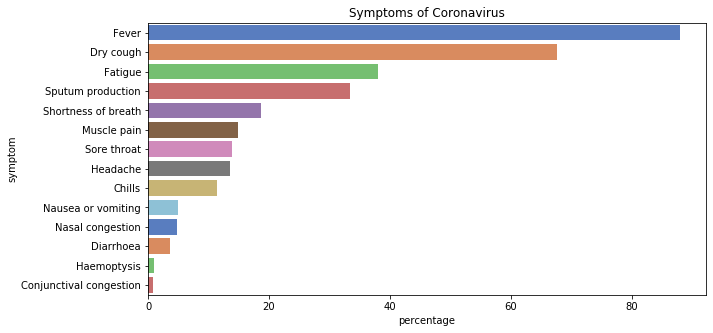

In [46]:
plt.figure(figsize=(10,5))
plt.title('Symptoms of Coronavirus')
sns.barplot(x=symptoms['percentage'],y=symptoms['symptom'],palette="muted",orient='h')

In [47]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [48]:
df['Country/Region'].nunique()  # getting unique no of countries infected by Covid-19

220

In [49]:
df['Country/Region'].value_counts() #getting no of records

US                                  3540
Mainland China                      2912
Canada                               728
Australia                            588
France                               477
UK                                   431
Netherlands                          195
Denmark                              140
Thailand                              94
Japan                                 94
Taiwan                                94
Macau                                 94
South Korea                           94
Hong Kong                             94
Singapore                             93
Vietnam                               93
Malaysia                              92
Nepal                                 91
Cambodia                              89
Sri Lanka                             89
Germany                               88
Finland                               87
Philippines                           87
United Arab Emirates                  87
India           

In [50]:
df[df['Country/Region']=='India']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


In [51]:
total_positive=df.loc[df['Country/Region'] == 'India', 'Confirmed'].sum() # checking confirmed cases for India
total_positive

275072.0

In [52]:
total_deaths=df.loc[df['Country/Region'] == 'India', 'Deaths'].sum() 
total_deaths

8757.0

In [53]:
total_recovered=df.loc[df['Country/Region'] == 'India', 'Recovered'].sum()
total_recovered

41824.0

In [54]:
total_tested=total_positive+total_deaths+total_recovered
total_tested

325653.0

In [55]:
test_million=(1000000*total_tested)/1300000000
test_million

250.50230769230768

In [56]:
print('Total no of Cases Tested :',total_tested)
print('Total no of Confirmed Cases :',total_positive)
print('Total no of Deaths :',total_deaths)
print('Total no of Recovered Cases :',total_recovered)
print('Totsl no of Tests per million :',test_million)

Total no of Cases Tested : 325653.0
Total no of Confirmed Cases : 275072.0
Total no of Deaths : 8757.0
Total no of Recovered Cases : 41824.0
Totsl no of Tests per million : 250.50230769230768


In [57]:
#Overall 
fig = go.Figure(data=[go.Pie(labels=['total_tested','Positive Cases from tested samples'],
                            values= [total_tested,total_positive],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=['#263fa3','#cc3c2f'], line=dict(color='#FFFFFF', width=5)))
fig.update_layout(title_text='COVID19 Test Results in india',plot_bgcolor='rgb(275, 270, 273)')

In [58]:
df_india=df.loc[df['Country/Region']=='India']
df_india

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


In [59]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_india['ObservationDate'],y=df_india['Confirmed'],mode='lines+markers',marker_color='blue'))
fig.update_layout(title_text='Trend of Cases in India')

In [60]:
perday_testing=pd.read_csv('ICMRTestingDetails.csv')

In [61]:
perday_testing.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases
0,1,13/03/20 18:00,6500.0,5900.0,78.0
1,2,18/03/20 18:00,13125.0,12235.0,150.0
2,3,19/03/20 18:00,14175.0,13285.0,182.0
3,4,20/03/20 18:00,15404.0,14514.0,236.0
4,5,21/03/20 18:00,16911.0,16021.0,315.0


In [62]:
import plotly.express as px
fig = px.bar(perday_testing,x=perday_testing['DateTime'],y=perday_testing['TotalSamplesTested'], barmode='group',height=550,orientation = 'v',color="TotalSamplesTested",color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.update_layout(title_text='Number of COVID-19 test conducted everyday',plot_bgcolor='rgb(275, 270, 273)')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Tests',xaxis_title='Date')
fig.show()

In [63]:
fig = go.Figure(data=[
go.Bar(name='Tested', x=perday_testing['DateTime'], y=perday_testing['TotalSamplesTested'],marker_color='#2fcc41'),
go.Bar(name='Positive', x=perday_testing['DateTime'], y=perday_testing['TotalPositiveCases'],marker_color='#FF0000')])
fig.update_layout(barmode='stack',width=800, height=700)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='Number of people tested and positive among them',
                  plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [64]:
df_india.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


In [65]:
fig = go.Figure(data=[
go.Bar(name='Confirmed', x=df_india['ObservationDate'], y=df_india['Confirmed'],marker_color='#2fcc41'),
go.Bar(name='Death', x=df_india['ObservationDate'], y=df_india['Deaths'],marker_color='#FF0000'),
go.Bar(name='Recovered', x=df_india['ObservationDate'], y=df_india['Recovered'],marker_color='blue')])
fig.update_layout(barmode='stack')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='Covid -19 Death,Cases and Recovery in india',
                  plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [66]:
feb=pd.DataFrame(data=df_india.head(n=31))
FebConfirmedCases=feb.Confirmed.sum()
DeathsinFeb=feb.Deaths.sum()
Recoveredinfeb=feb.Recovered.sum()
print('Confirmed Cases in Feb :',FebConfirmedCases)
print('Death Cases in Feb :',DeathsinFeb)
print('Recovered Cases in Feb :',Recoveredinfeb)

Confirmed Cases in Feb : 86.0
Death Cases in Feb : 0.0
Recovered Cases in Feb : 42.0


In [67]:
mar=pd.DataFrame(data=df_india[31:62])
MarConfirmedCases=mar.Confirmed.sum()
DeathsinMar=mar.Deaths.sum()
RecoveredinMar=mar.Recovered.sum()
print('Confirmed Cases in March :',MarConfirmedCases)
print('Death Cases in March :',DeathsinMar)
print('Recovered Cases in March :',RecoveredinMar)

Confirmed Cases in March : 10252.0
Death Cases in March : 226.0
Recovered Cases in March : 822.0


In [68]:
apr=pd.DataFrame(data=df_india[62:])
aprConfirmedCases=apr.Confirmed.sum()
Deathsinapr=apr.Deaths.sum()
Recoveredinapr=apr.Recovered.sum()
print('Confirmed Cases in April :',aprConfirmedCases)
print('Death Cases in April :',Deathsinapr)
print('Recovered Cases in April :',Recoveredinapr)

Confirmed Cases in April : 264734.0
Death Cases in April : 8531.0
Recovered Cases in April : 40960.0


In [69]:
d={'Month':['Feb','Mar','April'],'ConfirmedCases':[FebConfirmedCases,MarConfirmedCases,aprConfirmedCases],'Deaths':[DeathsinFeb,DeathsinMar,Deathsinapr],'Recovered':[Recoveredinfeb,RecoveredinMar,Recoveredinapr]}
df1=pd.DataFrame(data=d,columns=['Month','ConfirmedCases','Deaths','Recovered'])
df1

,Month,ConfirmedCases,Deaths,Recovered
0,Feb,86.0,0.0,42.0
1,Mar,10252.0,226.0,822.0
2,April,264734.0,8531.0,40960.0


In [75]:
fig = go.Figure(data=[go.Pie(labels=['FebConfirmedCases','DeathinFeb','Recoveredinfeb'],
                            values= [FebConfirmedCases,DeathsinFeb,Recoveredinfeb],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=['#263fa3','#cc3c2f'], line=dict(color='#FFFFFF', width=8)))
fig.update_layout(title_text='COVID19 Test Results in india Feb Month',plot_bgcolor='rgb(275, 270, 273)')

In [74]:
fig = go.Figure(data=[go.Pie(labels=['Mar-Confirmed-Cases','Death-in-Mar','Recovered-in-Mar'],
                            values= [MarConfirmedCases,DeathsinMar,RecoveredinMar],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=['#263fa3','#cc3c2f'], line=dict(color='#FFFFFF', width=8)))
fig.update_layout(title_text='COVID19 Test Results in india March Month',plot_bgcolor='rgb(275, 270, 273)')

In [73]:
fig = go.Figure(data=[go.Pie(labels=['apr-Confirmed-Cases','Death-in-Apr','Recovered-in-Apr'],
                            values= [aprConfirmedCases,Deathsinapr,Recoveredinapr],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=['#263fa3','#cc3c2f'], line=dict(color='#FFFFFF', width=8)))
fig.update_layout(title_text='COVID19 Test Results in india April Month',plot_bgcolor='rgb(275, 270, 273)')